<a href="https://colab.research.google.com/github/Sbbarse787/Chances-of-Admit-through-GREscore-using-Linear-regression-model/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [0]:
cd /gdrive/My Drive/Colab Notebooks/SAS

/gdrive/My Drive/Colab Notebooks/SAS


In [0]:
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
import pandas as pd
df=pd.read_csv("train.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [0]:
df.shape

(891, 12)

In [0]:
print(len(df))

891


In [0]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [0]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [0]:
df.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]>

In [0]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [0]:
embark=pd.get_dummies(df["Embarked"],drop_first=True)
embark.head(10)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
5,1,0
6,0,1
7,0,1
8,0,1
9,0,0


In [0]:
sex=pd.get_dummies(df['Sex'],drop_first=True)
sex.head(10)

,male
0,1
1,0
2,0
3,0
4,1
5,1
6,1
7,1
8,0
9,0


In [0]:
df=pd.concat([df,sex,embark],axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1


Removing of unwanted columns...

In [0]:
df.drop(['Sex','Embarked','PassengerId','Name','Ticket','Cabin','Fare'],axis=1,inplace=True)
df.head(5)

,Survived,Pclass,Age,SibSp,Parch,male,Q,S
0,0,3,22.0,1,0,1,0,1
1,1,1,38.0,1,0,0,0,0
2,1,3,26.0,0,0,0,0,1
3,1,1,35.0,1,0,0,0,1
4,0,3,35.0,0,0,1,0,1


In [0]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,male,Q,S
0,0,3,22.0,1,0,1,0,1
1,1,1,38.0,1,0,0,0,0
2,1,3,26.0,0,0,0,0,1
3,1,1,35.0,1,0,0,0,1
4,0,3,35.0,0,0,1,0,1


In [0]:
print(len(df))

891


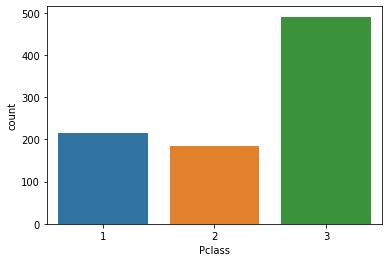

In [0]:
sns.countplot(x='Pclass',data=df)
#Number of PClass

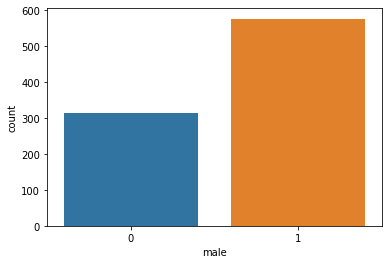

In [0]:
sns.countplot(x='male',data=df)
#Shows the number of Male(1) and Female(0)

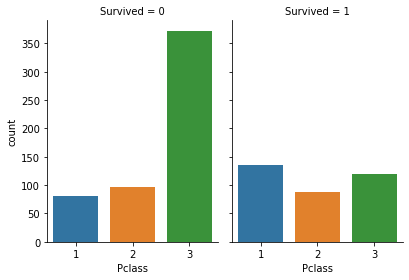

In [0]:

g = sns.catplot(x="Pclass", col="Survived",
                data=df, kind="count",
                height=4, aspect=.7);
                #Shows the Survival on the basis of Classes


WRANGLING

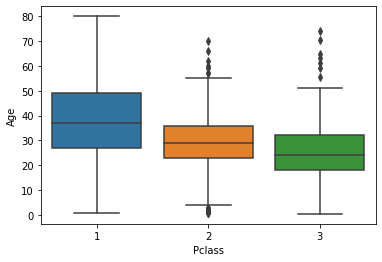

In [0]:
sns.boxplot(x="Pclass",y="Age",data=df)

More aged people belongs to First class 

Removing NAN Values

In [0]:
df.dropna(inplace=True)

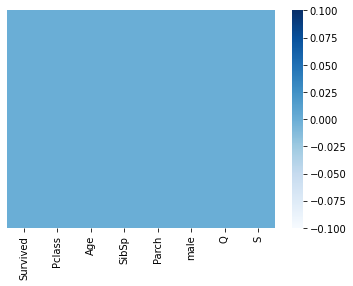

In [0]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='Blues') #To check Our NAN Value is removed or not... and its removed

Now We Dont have any Nan Values

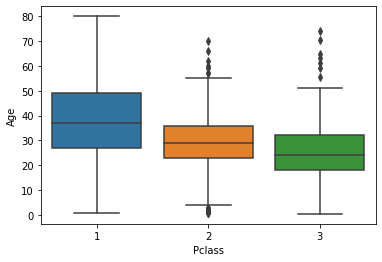

In [0]:
sns.boxplot(x="Pclass",y="Age",data=df)

Despite of Removing Nan Values our result is Same Yeyyy

**NOW Lets do Training and Spliting Of Dataset**

In [0]:
X=df.drop("Survived",axis=1)
y=df["Survived"]


In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)


**LOGISTIC MODEL**

In [0]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predictions=logmodel.predict(X_test)
from sklearn.metrics import classification_report
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.82      0.84      0.83       134\n           1       0.72      0.70      0.71        81\n\n    accuracy                           0.79       215\n   macro avg       0.77      0.77      0.77       215\nweighted avg       0.79      0.79      0.79       215\n'

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[112,  22],
       [ 24,  57]])

So logistic is giving 76% precision...

Now Lets See How other classification model give precision to Our dataset

Lets start with **random forest**

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [0]:
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
pred_rfc=rfc.predict(X_test)

In [0]:
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       134
           1       0.70      0.79      0.74        81

    accuracy                           0.80       215
   macro avg       0.78      0.79      0.79       215
weighted avg       0.80      0.80      0.80       215

[[107  27]
 [ 17  64]]


In [0]:
 print(y_test[:10])
 print(pred_rfc[:10])

689    1
278    0
506    1
9      1
494    0
149    0
473    1
467    0
795    0
864    0
Name: Survived, dtype: int64
[1 0 1 1 0 1 1 0 0 0]


Sooo Rainforest is giving 81% accuracy quite Goood

Now lets check the other model
**SVM  Classifier**

In [0]:
from sklearn import svm
from sklearn.svm import SVC

In [0]:
clf=svm.SVC()
clf.fit(X_train,y_train)
pred_clf=clf.predict(X_test)

In [0]:
print(classification_report(y_test,pred_clf))
print(confusion_matrix(y_test,pred_clf))

              precision    recall  f1-score   support

           0       0.65      0.96      0.77       134
           1       0.69      0.14      0.23        81

    accuracy                           0.65       215
   macro avg       0.67      0.55      0.50       215
weighted avg       0.66      0.65      0.57       215

[[129   5]
 [ 70  11]]


SO Our SVM is giving a 68% Accuracy okkkk!

Now lets check another Model

**Decision Tree**

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree, metrics, model_selection, preprocessing
from sklearn import tree
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [0]:
y_pred = dtree.predict(X_test)
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 41
Accuracy: 0.81


In [0]:
print(y_test[:10],y_pred[:10])

689    1
278    0
506    1
9      1
494    0
149    0
473    1
467    0
795    0
864    0
Name: Survived, dtype: int64 [1 1 1 1 0 0 1 0 0 0]


Decision Tree is giving as a accuracy of 81% quite good

Now lets check the accuracy With..

**Neural Network!!**

In [0]:
from sklearn.neural_network import MLPClassifier

In [0]:
mlpc=MLPClassifier(hidden_layer_sizes=(9,9,9),max_iter=500)
mlpc.fit(X_train,y_train)
pred_mlpc=mlpc.predict(X_test)

In [0]:
print(classification_report(y_test,pred_mlpc))
print(confusion_matrix(y_test,pred_mlpc))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       134
           1       0.77      0.73      0.75        81

    accuracy                           0.81       215
   macro avg       0.80      0.80      0.80       215
weighted avg       0.81      0.81      0.81       215

[[116  18]
 [ 22  59]]


In [0]:
print(y_test[:10],pred_mlpc[:10])

689    1
278    0
506    1
9      1
494    0
149    0
473    1
467    0
795    0
864    0
Name: Survived, dtype: int64 [1 0 1 1 0 0 1 0 0 0]


Ok so Neural Network is giving a Precision Of 81 % OKKK

So Lets Try the:
**Naive Bayes**

In [104]:
from sklearn import naive_bayes, metrics, model_selection, preprocessing
gnb = naive_bayes.GaussianNB(priors=None)
gnb.fit(X_train_std, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
sc = preprocessing.StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [0]:
y_pred = gnb.predict(X_test_std)

In [107]:
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 56
Accuracy: 0.74


So Naive Bayes is giving 74 % Accuracy 